In [1]:
import pandas as pd

df = pd.read_csv('datos_produccion_manufactura_ES.csv', encoding='latin1')

df.head()

,Fecha,Turno,ID_Maquina,Unidades_Producidas,Unidades_Defectuosas,Tipo_Defecto_Principal,Minutos_Paro,Motivo_del_Paro
0,01/10/2023,Mañana,M1,231,5,Dimensión fuera de especificación,15,Error del Operador
1,01/10/2023,Mañana,M2,203,18,Dimensión fuera de especificación,0,NaN
2,01/10/2023,Mañana,M3,209,4,Falla de material,0,NaN
3,01/10/2023,Mañana,M4,228,5,Rayadura,0,NaN
4,01/10/2023,Tarde,M1,234,7,Dimensión fuera de especificación,0,NaN


In [2]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Fecha                   360 non-null    str  
 1   Turno                   360 non-null    str  
 2   ID_Maquina              360 non-null    str  
 3   Unidades_Producidas     360 non-null    int64
 4   Unidades_Defectuosas    360 non-null    int64
 5   Tipo_Defecto_Principal  360 non-null    str  
 6   Minutos_Paro            360 non-null    int64
 7   Motivo_del_Paro         69 non-null     str  
dtypes: int64(3), str(5)
memory usage: 22.6 KB


In [3]:
total_def = df['Unidades_Defectuosas'].sum()
total_prod = df['Unidades_Producidas'].sum()

porcentaje = (total_def / total_prod) * 100

print("Porcentaje total de defectos:", porcentaje)


Porcentaje total de defectos: 4.293864608106879


In [4]:
resumen = df.groupby('ID_Maquina')[['Unidades_Producidas','Unidades_Defectuosas']].sum()

resumen['Tasa_Defectos'] = (
    resumen['Unidades_Defectuosas'] / resumen['Unidades_Producidas']
) * 100

resumen


,Unidades_Producidas,Unidades_Defectuosas,Tasa_Defectos
ID_Maquina,,,
M1,19395,577,2.974994
M2,19366,1589,8.205102
M3,18978,581,3.061440
M4,19208,557,2.899833


In [5]:
pareto = (
    df.groupby('Tipo_Defecto_Principal')['Unidades_Producidas']
    .sum()
    .sort_values(ascending=False)
)

pareto


Tipo_Defecto_Principal
Dimensión fuera de especificación    23787
Rayadura                             21233
Error de ensamblaje                  13738
Falla de material                     9739
Otro                                  7973
Ninguno                                477
Name: Unidades_Producidas, dtype: int64

In [6]:
pareto = (
    df.groupby('Tipo_Defecto_Principal')['Unidades_Defectuosas']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

pareto['Frecuencia_Relativa'] = (
    pareto['Unidades_Defectuosas'] /
    pareto['Unidades_Defectuosas'].sum()
)

pareto['Acumulado'] = pareto['Frecuencia_Relativa'].cumsum()

pareto


,Tipo_Defecto_Principal,Unidades_Defectuosas,Frecuencia_Relativa,Acumulado
0,Dimensión fuera de especificación,1412,0.427361,0.427361
1,Rayadura,706,0.213680,0.641041
2,Error de ensamblaje,549,0.166162,0.807203
3,Otro,351,0.106235,0.913438
4,Falla de material,286,0.086562,1.000000
5,Ninguno,0,0.000000,1.000000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15460\1493265506.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(


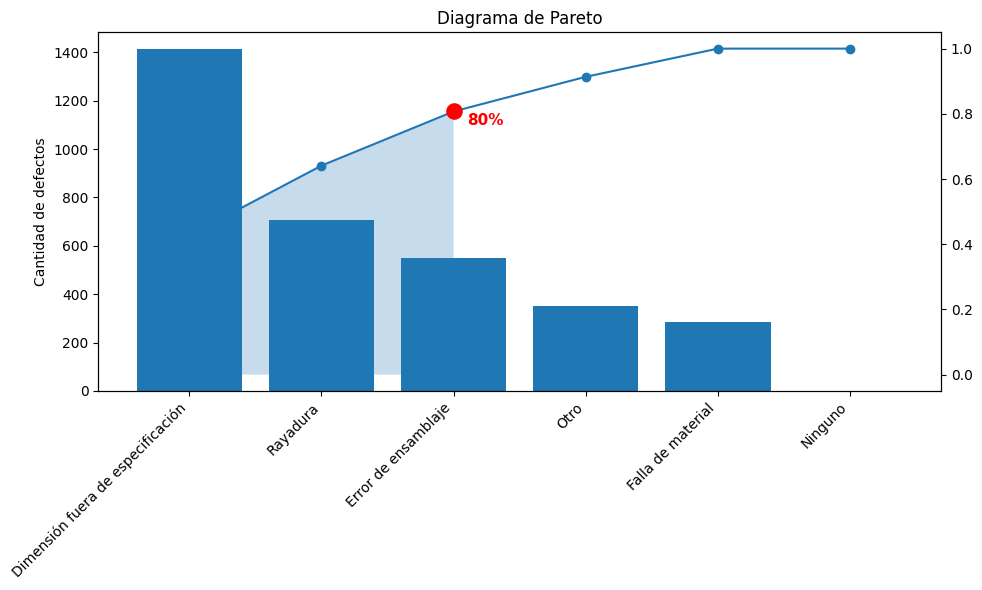

In [7]:
import matplotlib.pyplot as plt

# Índice donde se alcanza el 80%
indice_80 = pareto[pareto['Acumulado'] >= 0.8].index[0]

# Coordenadas del punto 80-20
x_80 = indice_80
y_80 = pareto.loc[indice_80, 'Acumulado']

fig, ax1 = plt.subplots(figsize=(10,6))

# Barras
ax1.bar(
    pareto['Tipo_Defecto_Principal'],
    pareto['Unidades_Defectuosas']
)

ax1.set_ylabel('Cantidad de defectos')

# Línea acumulada
ax2 = ax1.twinx()

ax2.plot(
    pareto['Tipo_Defecto_Principal'],
    pareto['Acumulado'],
    marker='o'
)

# 👉 Sombrear área de los pocos vitales
ax2.fill_between(
    range(indice_80 + 1),
    pareto['Acumulado'][:indice_80 + 1],
    alpha=0.25
)

# 👉 Punto 80-20
ax2.scatter(
    x_80,
    y_80,
    color='red',
    s=120,
    zorder=5
)

# 👉 Anotación
ax2.annotate(
    '80%',
    (x_80, y_80),
    textcoords="offset points",
    xytext=(10,-10),
    fontsize=11,
    fontweight='bold',
    color='red'
)

plt.title('Diagrama de Pareto')

ax1.set_xticklabels(
    pareto['Tipo_Defecto_Principal'],
    rotation=45,
    ha='right'
)

plt.tight_layout()
plt.show()


In [8]:
df.columns = (
    df.columns
    .str.strip()
    .str.replace(' ', '_')
)


In [9]:
m2 = df[df['ID_Maquina'] == 'M2']
m2.head()


,Fecha,Turno,ID_Maquina,Unidades_Producidas,Unidades_Defectuosas,Tipo_Defecto_Principal,Minutos_Paro,Motivo_del_Paro
1,01/10/2023,Mañana,M2,203,18,Dimensión fuera de especificación,0,NaN
5,01/10/2023,Tarde,M2,232,15,Error de ensamblaje,0,NaN
9,01/10/2023,Noche,M2,180,11,Otro,15,Mantenimiento Preventivo
13,02/10/2023,Mañana,M2,242,26,Dimensión fuera de especificación,0,NaN
17,02/10/2023,Tarde,M2,182,14,Dimensión fuera de especificación,0,NaN


In [10]:
defectos_m2 = (
    m2.groupby('Tipo_Defecto_Principal')['Unidades_Defectuosas']
    .sum()
    .sort_values(ascending=False)
)

defectos_m2


Tipo_Defecto_Principal
Dimensión fuera de especificación    1055
Error de ensamblaje                   193
Otro                                  150
Rayadura                              141
Falla de material                      50
Name: Unidades_Defectuosas, dtype: int64

In [11]:
downtime = (
    df.groupby('Motivo_del_Paro')['Minutos_Paro']
    .sum()
    .sort_values(ascending=False)
)

downtime


Motivo_del_Paro
Corte de Energía            690
Rotura de Herramienta       510
Escasez de Material         465
Error del Operador          450
Mantenimiento Preventivo    450
Name: Minutos_Paro, dtype: int64

In [ ]:
print(df.columns)


Index(['Fecha', 'Turno', 'ID_Maquina', 'Unidades_Producidas',
       'Unidades_Defectuosas', 'Tipo_Defecto_Principal', 'Minutos_Paro',
       'Motivo_del_Paro'],
      dtype='str')


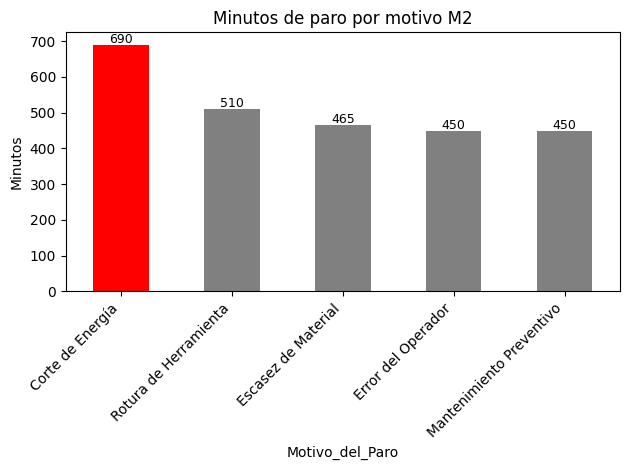

In [12]:
import matplotlib.pyplot as plt

# Crear lista de colores
colores = [
    'red' if motivo == 'Corte de Energía' else 'gray'
    for motivo in downtime.index
]

# Gráfico
downtime.plot(kind='bar', color=colores)

plt.title('Minutos de paro por motivo M2')
plt.ylabel('Minutos')
plt.xticks(rotation=45, ha='right')

# Etiquetas de frecuencia
for i, v in enumerate(downtime):
    plt.text(i, v + 5, f'{v:.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()




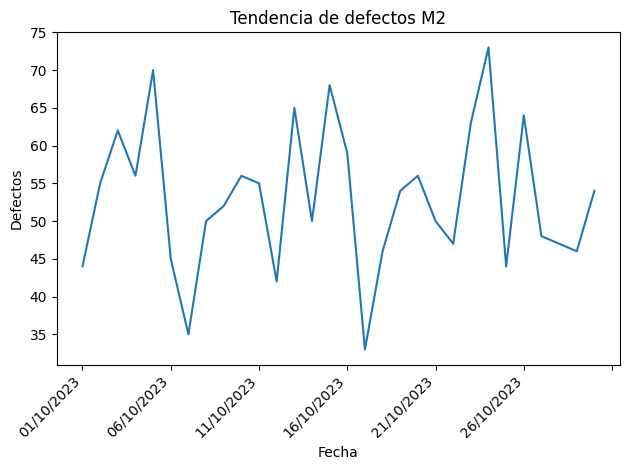

In [13]:
import matplotlib.pyplot as plt

tendencia_m2 = (
    m2.groupby('Fecha')['Unidades_Defectuosas']
    .sum()
)

tendencia_m2.plot()

plt.title('Tendencia de defectos M2')
plt.ylabel('Defectos')

# Rotar fechas 45 grados
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [14]:
df.columns


Index(['Fecha', 'Turno', 'ID_Maquina', 'Unidades_Producidas',
       'Unidades_Defectuosas', 'Tipo_Defecto_Principal', 'Minutos_Paro',
       'Motivo_del_Paro'],
      dtype='str')

In [15]:
df.columns = df.columns.str.strip()


In [16]:
pareto.to_csv(
    'export_powerbi/pareto_defectos.csv',
    index=False
)


In [17]:
resumen_maquina = (
    df.groupby('ID_Maquina')
    .agg({
        'Unidades_Producidas': 'sum',
        'Unidades_Defectuosas': 'sum',
        'Minutos_Paro': 'sum'
    })
)

resumen_maquina


,Unidades_Producidas,Unidades_Defectuosas,Minutos_Paro
ID_Maquina,,,
M1,19395,577,750
M2,19366,1589,615
M3,18978,581,510
M4,19208,557,690


In [18]:
resumen_maquina.to_csv(
    'export_powerbi/resumen_maquinas.csv'
)


In [19]:
m2 = df[df['ID_Maquina'] == 'M2']

m2.head()


,Fecha,Turno,ID_Maquina,Unidades_Producidas,Unidades_Defectuosas,Tipo_Defecto_Principal,Minutos_Paro,Motivo_del_Paro
1,01/10/2023,Mañana,M2,203,18,Dimensión fuera de especificación,0,NaN
5,01/10/2023,Tarde,M2,232,15,Error de ensamblaje,0,NaN
9,01/10/2023,Noche,M2,180,11,Otro,15,Mantenimiento Preventivo
13,02/10/2023,Mañana,M2,242,26,Dimensión fuera de especificación,0,NaN
17,02/10/2023,Tarde,M2,182,14,Dimensión fuera de especificación,0,NaN


In [20]:
downtime_m2 = (
    m2.groupby('Motivo_del_Paro')['Minutos_Paro']
    .sum()
    .sort_values(ascending=False)
)

downtime_m2

Motivo_del_Paro
Rotura de Herramienta       255
Corte de Energía            105
Mantenimiento Preventivo    105
Escasez de Material          75
Error del Operador           75
Name: Minutos_Paro, dtype: int64

In [21]:
downtime_m2 = downtime_m2.reset_index()


In [22]:
downtime_m2.to_csv(
    'export_powerbi/downtime_m2.csv',
    index=False
)


In [23]:
tendencia_m2 = tendencia_m2.reset_index()

tendencia_m2.to_csv(
    'export_powerbi/tendencia_m2.csv',
    index=False
)
